<a href="https://colab.research.google.com/github/kdmoreira/data-science-alura/blob/master/starting-with-data-science/1_first_steps_4_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

In [5]:
import pandas as pd
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()
# abaixo, uma série (índice e valores), que é apenas uma coluna do conjunto
tmdb["original_language"].value_counts() # quantas vezes idiomas aparecem
tmdb.original_language.value_counts() # mesmo efeito


en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
ar       2
ta       2
cs       2
ro       2
id       2
nb       1
vi       1
ky       1
hu       1
el       1
ps       1
xx       1
te       1
af       1
sl       1
is       1
pl       1
no       1
tr       1
Name: original_language, dtype: int64

In [6]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'fa', 'nl', 'he', 'th', 'ar', 'ta', 'cs', 'ro', 'id', 'nb',
       'vi', 'ky', 'hu', 'el', 'ps', 'xx', 'te', 'af', 'sl', 'is', 'pl', 'no',
       'tr'],
      dtype='object')

In [7]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [57]:
# agora teremos um dataframe
contagem_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_lingua.columns = ["original_language", "total"]
contagem_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


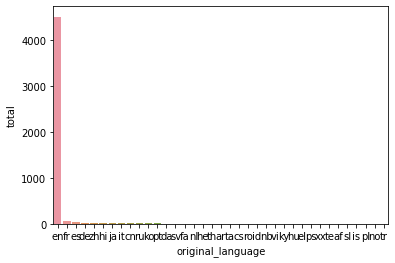

In [12]:
import seaborn as sns
# plotagem é possível fazer agora que temos um dataframe
sns.barplot(x = "original_language", y = "total", data = contagem_lingua)

In [14]:
print(sns.__version__)
# usar !pip instal seaborn==numeroversao caso seja necessário
# dar um restart no runtime ao fazer isso

0.11.0


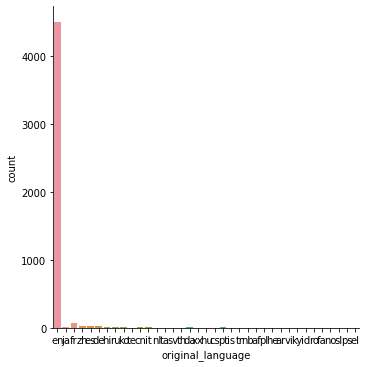

In [13]:
# maneira mais simples de fazer
sns.catplot(x = "original_language", kind = "count", data = tmdb)

**Conveying a message with visualization**

4505 298


{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

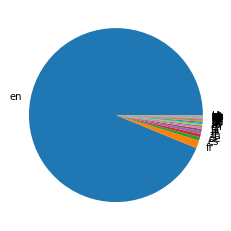

In [53]:
import matplotlib.pyplot as plt
# gráficos de pizza são pouco recomendados
plt.pie(contagem_lingua["total"], labels = contagem_lingua["original_language"])
# organizando os dados de outra forma
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)
# criando um dataframe
dados = {"lingua":["ingles", "outros"], "total":[total_de_ingles,
                                                 total_do_resto]}
dados

In [31]:
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


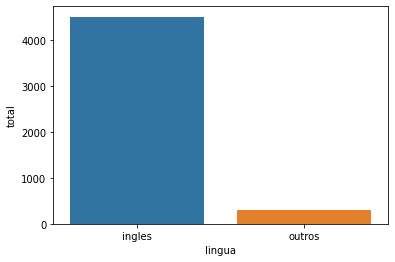

In [34]:
sns.barplot(x ="lingua", y ="total", data = dados)

In [59]:
total_por_lingua_de_outros_filmes = tmdb.query(
  "original_language != 'en'").original_language.value_counts()

In [60]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

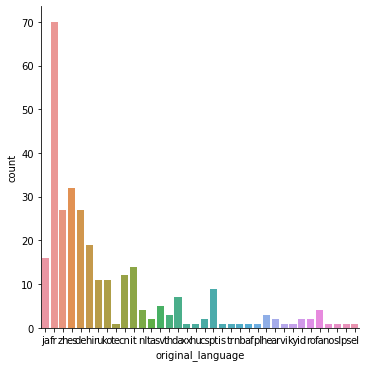

In [56]:
sns.catplot(x = "original_language", kind = "count", data = 
            filmes_sem_lingua_original_em_ingles)

Atividade:

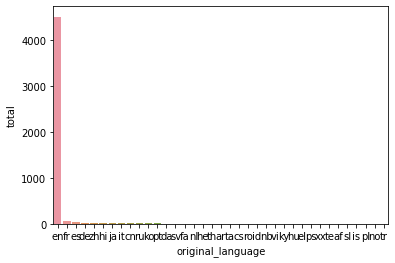

In [63]:
tmdb["original_language"].value_counts().index
tmdb["original_language"].value_counts().values
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()
sns.barplot(x = "original_language", y = "total", data = contagem_de_lingua)

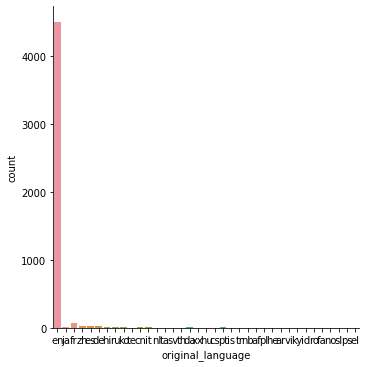

In [51]:
sns.catplot(x = "original_language", kind = "count", data = contagem_de_lingua)